# Prog3 2D-Simulation und Prof of Concept

Für die Simulation wurden als erstes die Daten für die Simulation vorbereitet, und alle nötigen Packages importiert. Da auf die Daten schon in der Vorherigen Aufgabe eingegangen sind, werden diese hier nicht mehr eingefügt.

In [1]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt

colors = ["orange", "blue", "red"]
planets = ["sun", "earth", "mars"]
mass = np.array([1.98*10**(30),5.9722*10**(24),6.417 * 10**(23)])
velocity = np.array([[0,0,0], [0,29785.8,0], [0,24130,0]])
position = np.array([[0,0,0], [149* 10**9,0,0], [228* 10**9,0,0]])
G = 6.672*10**(-11)
deltaT = 10800 # 1 Stunde = 3600 s, 1 Tag = 86400 s, Angabe ist in Sekunden, 3 Stunden = 10800 s


Als nächstes wird die Funktion für die Gesmatbeschleunigung aus dem verschieden Planeten berechnet und zurück gegeben:
Die dafür verwendeten Formeln sind:

$$ F_{G,1} = G \frac{m_1 \cdot m_2}{|\vec r_2 - \vec r_1 |^3}(\vec r_2 - \vec r_1) $$

$$ G = 6.672*10^{-11} \frac{Nm²}{kg²} $$

Berechnung der Beschleunigung aus der Gesamtkraft ($ \sum F = m \cdot \vec a \equiv \vec a = \frac{\sum F}{m} $):
$$ \vec a = \frac{1}{m_1} \cdot \sum F_{G,1} $$


Einsetzen von Formel ergibt:
$$ \vec a = \frac{1}{m_1} \cdot \sum G \frac{m_1 \cdot m_2}{|\vec r_2 - \vec r_1 |^3}(\vec r_2 - \vec r_1) $$


In [2]:
def calculateAcceleration(planetIndex):
    totalForce = 0
    for index, value in enumerate(mass):
        if index == planetIndex:
            continue
        force = G*((mass[planetIndex]*value)/(np.linalg.norm(position[index]-position[planetIndex]))**3)*(position[index]-position[planetIndex])
        totalForce = totalForce + force
    acceleration = totalForce / mass[planetIndex]
    return acceleration

Nun wird die Funktion für die Position eingebaut, dabei werden folgende Formeln verwendet:
$$ \vec r(t+∆t) ≈ \vec r(t) + ∆t\cdot \dot {\vec r}(t) + \frac{∆t²}{2}\ddot {\vec r}(t) $$

Berechnung der Geschwindigkeit:
$$ \vec v = \vec v_{old} + \Delta t \cdot \vec a $$


Mithilfe von $\vec a$ und $\vec v$ kommt man schrittweise auf die Position $\vec r$:
$$ \vec r(t+ \Delta t) ≈ \vec r(t) + \Delta t \cdot \vec v + \frac{\Delta t²}{2} \cdot \vec a $$

In [3]:
def calculateNewPosition(planetIndex):
    accel = calculateAcceleration(planetIndex)
    newPos = position[planetIndex] +  velocity[planetIndex] * deltaT + 1/2 * accel * deltaT**2
    velocity[planetIndex] = velocity[planetIndex] + accel * deltaT
    return newPos

Für die Simulation muss der Start initizalisiert werden, dies wird in der nachfolgenden Funktion gemacht:

In [4]:
def plotStartPositions():
    for index, pos in enumerate(position):
        plt.scatter(pos[0], pos[1], c=colors[index])
  

Der eigentliche Teil ist die Simulationsfunktion, welche über die Planeten geht und die neue Position berechnen lässt.

In [17]:
def simulate():
    newPositions = []
    for index, planet in enumerate(planets):
        if planet == "sun":
            newPositions.append([0,0,0])
            continue
        newPos = calculateNewPosition(index)
        newPositions.append(newPos)
        plt.scatter(newPos[0], newPos[1], c=colors[index])
    position = np.array(newPositions)

Der Start der Simulation und wielange simuliert werden soll.

In [20]:
def startSimulation():
    plotStartPositions()
    for i in range(100): #für ein Jahr muss abhänig von DeltaT gewählt werden, DeltaT = 3600: 8760, für DeltaT = 86400: 365
        simulate()

Die Hauptfunktion und das 2D Plotting

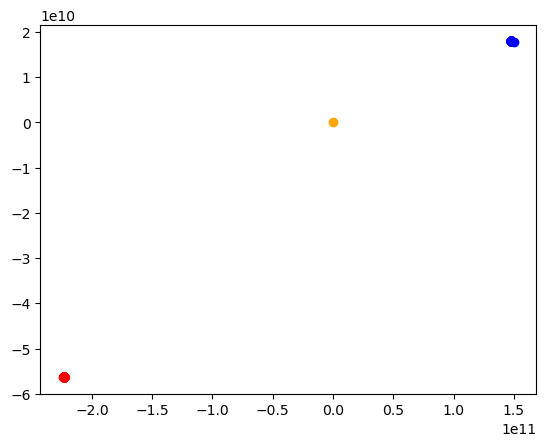

In [21]:
if __name__ == "__main__":
    startSimulation()
    plt.show()

Noch fragen?